In [30]:
import pywt
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from scipy.signal import butter, filtfilt

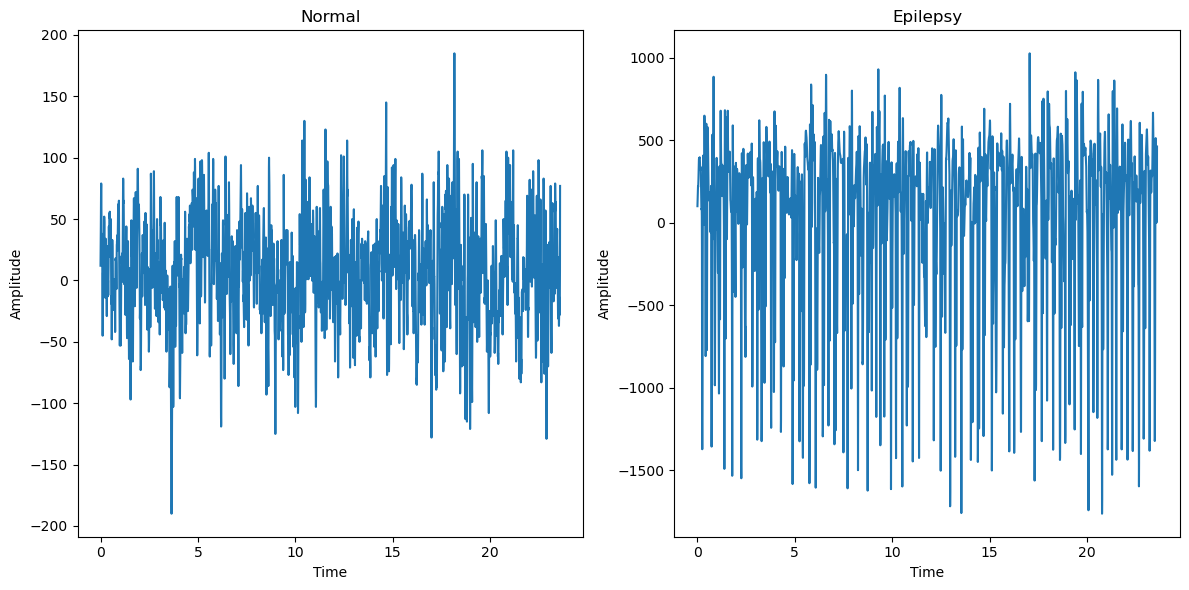

In [32]:
input_folder_1 = "z/Z/Z001.txt"  # Replace with the actual path to your first input folder
input_folder_2 = "s/S/S001.txt"  # Replace with the actual path to your second input folder
# Load data from the first file
signal1 = np.loadtxt(input_folder_1)
# Create a time array (assuming a constant sampling rate)
sampling_rate = 173.61  # Replace with the actual sampling rate if known
time1 = np.arange(len(signal1)) / sampling_rate

# Load data from the second file
signal2 = np.loadtxt(input_folder_2)
time2 = np.arange(len(signal2)) / sampling_rate 

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first signal
ax1.plot(time1, signal1)
ax1.set_title('Normal')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')

# Plot the second signal
ax2.plot(time2, signal2)
ax2.set_title('Epilepsy')
ax2.set_xlabel('Time')
ax2.set_ylabel('Amplitude')

# Adjust spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

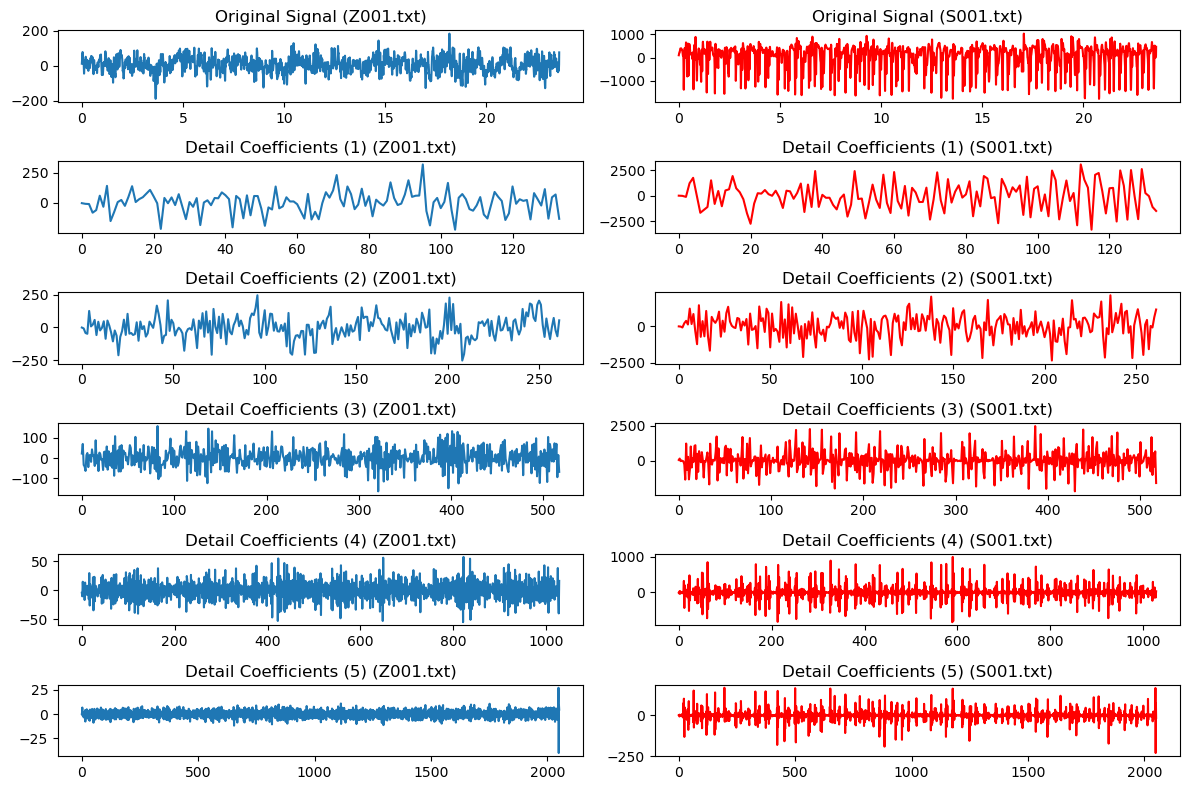

In [34]:
# Wavelet decomposition
wavelet = 'db4'
level = 5

coeffs1 = pywt.wavedec(signal1, wavelet, level=level)
coeffs2 = pywt.wavedec(signal2, wavelet, level=level)

# Reconstruct the approximation and detail coefficients
cA1, cD1 = coeffs1[0], coeffs1[1:]
cA2, cD2 = coeffs2[0], coeffs2[1:]

# Plotting
fig, axes = plt.subplots(level + 1, 2, figsize=(12, 8))

# Plot the original signals
axes[0, 0].plot(time1, signal1)
axes[0, 0].set_title('Original Signal (Z001.txt)')
axes[0, 1].plot(time2, signal2, color='red')
axes[0, 1].set_title('Original Signal (S001.txt)')

# Plot the approximation and detail coefficients
for i in range(level):
    axes[i + 1, 0].plot(cD1[i])
    axes[i + 1, 0].set_title(f'Detail Coefficients ({i + 1}) (Z001.txt)')
    axes[i + 1, 1].plot(cD2[i], color='red')
    axes[i + 1, 1].set_title(f'Detail Coefficients ({i + 1}) (S001.txt)')

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

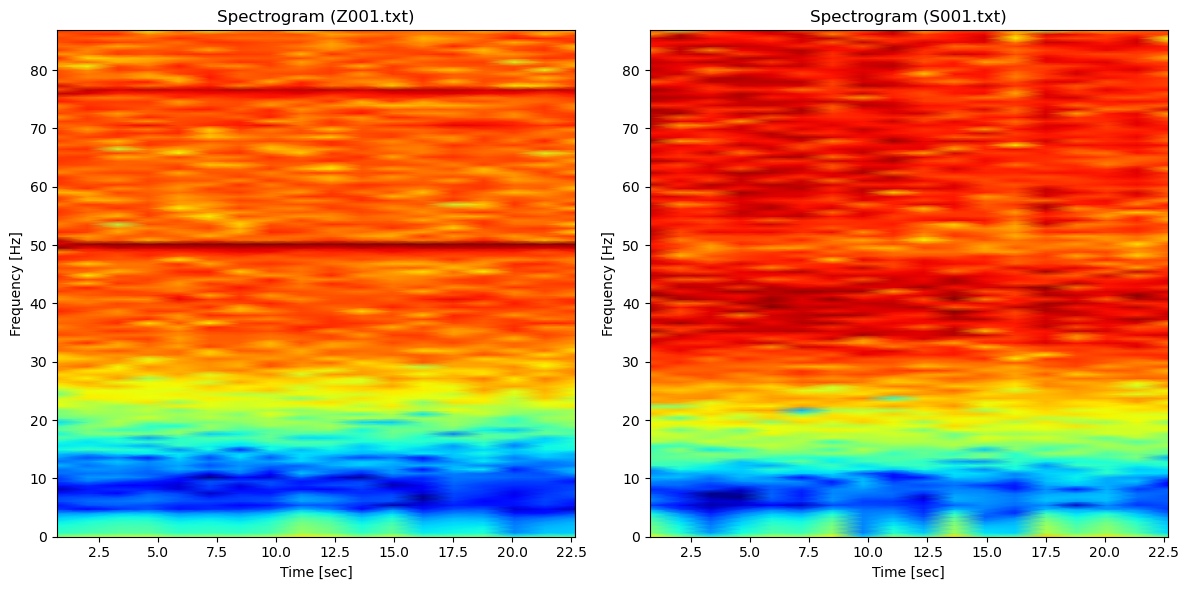

In [33]:
signal1 = np.loadtxt(input_folder_1)
sampling_rate = 173.61
time1 = np.arange(len(signal1)) / sampling_rate

signal2 = np.loadtxt(input_folder_2)
time2 = np.arange(len(signal2)) / sampling_rate

# High-pass filter
cutoff_freq = 40
nyquist_freq = 0.5 * sampling_rate
normal_cutoff = cutoff_freq / nyquist_freq
b, a = butter(4, normal_cutoff, btype='high', analog=False)

filtered_signal1 = filtfilt(b, a, signal1)
filtered_signal2 = filtfilt(b, a, signal2)

# Spectrograms
frequencies1, times1, spectrogram1 = signal.spectrogram(filtered_signal1, fs=sampling_rate)
frequencies2, times2, spectrogram2 = signal.spectrogram(filtered_signal2, fs=sampling_rate)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pcolormesh(times1, frequencies1, 10 * np.log10(spectrogram1), shading='gouraud', cmap='jet')
ax1.set_title('Spectrogram (Z001.txt)')
ax1.set_ylabel('Frequency [Hz]')
ax1.set_xlabel('Time [sec]')

ax2.pcolormesh(times2, frequencies2, 10 * np.log10(spectrogram2), shading='gouraud', cmap='jet')
ax2.set_title('Spectrogram (S001.txt)')
ax2.set_ylabel('Frequency [Hz]')
ax2.set_xlabel('Time [sec]')

plt.tight_layout()
plt.show()